<a href="https://colab.research.google.com/github/elizabethts/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
from scipy.stats import norm, sem, t, ttest_1samp, ttest_ind, chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
column_headers = ['A1', 'A2','A3', 'A4','A5', 'A6','A7', 'A8','A9', 'A10','A11'
                  ,'A12', 'A13','A14', 'A15','A16']
df = pd.read_csv(url, names = column_headers)

#fix NaN values
nan_values = {'?': np.nan}
df = df.replace(nan_values)

#convert continuous variables to floats
df['A2'] = pd.to_numeric(df['A2'], errors='coerce')
df['A14'] = pd.to_numeric(df['A14'], errors='coerce')
df['A11'] = df['A11'].astype(float)
df['A15'] = df['A15'].astype(float)

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [0]:
print(df.shape)
df.dtypes

(690, 16)


A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
plus = df[df['A16'] == '+']
minus = df[df['A16'] == '-']

In [0]:
print('Plus w/ A2: ', plus['A2'].mean())
print('Minus w/ A2: ', minus['A2'].mean())

Plus w/ A2:  33.7204918032787
Minus w/ A2:  29.80823056300268


In [0]:
ttest_ind(plus['A2'],minus['A2'], nan_policy = 'omit')

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

In [0]:
print('Plus w/ A3: ', plus['A3'].mean())
print('Minus w/ A3: ', minus['A3'].mean())

Plus w/ A3:  5.904951140065144
Minus w/ A3:  3.839947780678851


In [0]:
ttest_ind(plus['A3'],minus['A3'], nan_policy = 'omit')

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

In [0]:
print('Plus w/ A8: ', plus['A8'].mean())
print('Minus w/ A8: ', minus['A8'].mean())

Plus w/ A8:  3.427899022801302
Minus w/ A8:  1.2579242819843346


In [0]:
ttest_ind(plus['A8'],minus['A8'], nan_policy = 'omit')

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

In [0]:
print('Plus w/ A 11: ', plus['A11'].mean())
print('Minus w/ A 11: ', minus['A11'].mean())

Plus w/ A 11:  4.605863192182411
Minus w/ A 11:  0.6318537859007833


In [0]:
ttest_ind(plus['A11'],minus['A11'], nan_policy = 'omit')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

In [0]:
print('Plus w/ A14: ', plus['A14'].mean())
print('Minus w/ A14: ', minus['A14'].mean())

Plus w/ A14:  164.421926910299
Minus w/ A14:  199.6994680851064


In [0]:
ttest_ind(plus['A14'],minus['A14'], nan_policy = 'omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [0]:
print('Plus w/ A15: ', plus['A15'].mean())
print('Minus w/ A15: ', minus['A15'].mean())

Plus w/ A15:  2038.85993485342
Minus w/ A15:  198.60574412532637


In [0]:
ttest_ind(plus['A15'],minus['A15'], nan_policy = 'omit')

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

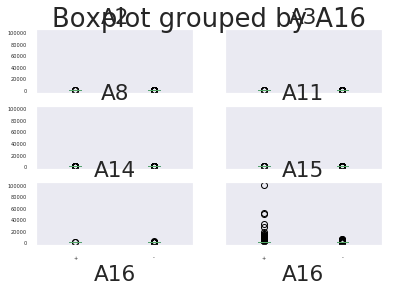

In [0]:
#Plot the bar chart
continuous = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
df.boxplot(column=continuous, by='A16', grid = False, fontsize=5);


+         AxesSubplot(0.1,0.15;0.363636x0.75)
-    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

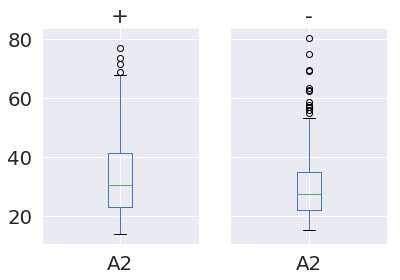

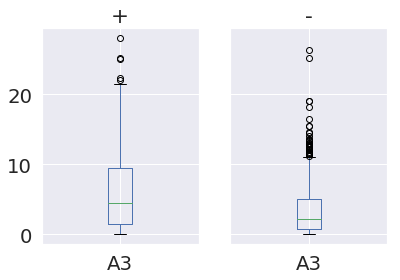

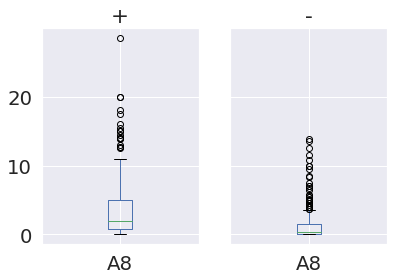

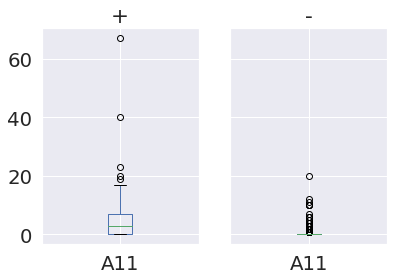

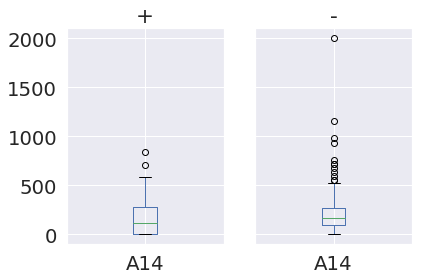

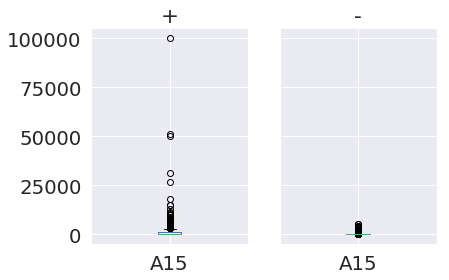

In [0]:
df.groupby('A16').boxplot(column='A2')
df.groupby('A16').boxplot(column='A3')
df.groupby('A16').boxplot(column='A8')
df.groupby('A16').boxplot(column='A11')
df.groupby('A16').boxplot(column='A14')
df.groupby('A16').boxplot(column='A15')

In [0]:
ctable1 = pd.crosstab(df['A16'],df['A1'])
print(ctable1)

ctable2 = pd.crosstab(df['A16'],df['A4'])
print(ctable2)

ctable3 = pd.crosstab(df['A16'],df['A5'])
print(ctable3)

ctable4 = pd.crosstab(df['A16'],df['A6'])
print(ctable4)

ctable5 = pd.crosstab(df['A16'],df['A7'])
print(ctable5)

ctable6 = pd.crosstab(df['A16'],df['A9'])
print(ctable6)

ctable7 = pd.crosstab(df['A16'],df['A10'])
print(ctable7)

ctable8 = pd.crosstab(df['A16'],df['A12'])
print(ctable8)

ctable9 = pd.crosstab(df['A16'],df['A13'])
print(ctable9)

A1     a    b
A16          
+     98  206
-    112  262
A4   l    u    y
A16             
+    2  256   45
-    0  263  118
A5     g  gg    p
A16              
+    256   2   45
-    263   0  118
A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
+    19  62  29   7  14   7  14  3  14  16  51  2  33  32
-    35  75  12  23  11  46  45  7  37  22  27  1  31   6
A7   bb  dd  ff   h  j  n  o    v  z
A16                                 
+    25   2   8  87  3  2  1  169  6
-    34   4  49  51  5  2  1  230  2
A9     f    t
A16          
+     23  284
-    306   77
A10    f    t
A16          
+     98  209
-    297   86
A12    f    t
A16          
+    161  146
-    213  170
A13    g  p   s
A16            
+    287  5  15
-    338  3  42


In [0]:
#chi2_contingency() returns [chi squared stat, p- val , dof, expected value contingency table]

#A16 w A1
chi1, p1, _, _ = chi2_contingency(ctable1)
print('A1: chi-squared=', round(chi1,4), 'p-value=', round(p1,4))

#A16 w A4
chi2, p2, _, _ = chi2_contingency(ctable2)
print('A4: chi-squared=', round(chi2,4), 'p-value=', round(p2,10))

#A16 w A5
chi3, p3, _, _ = chi2_contingency(ctable3)
print('A5: chi-squared=', round(chi3,4), 'p-value=', round(p3,10))

#A16 w A6
chi4, p4, _, _ = chi2_contingency(ctable4)
print('A6: chi-squared=', round(chi4,4), 'p-value=', round(p4,15))

#A16 w A7
chi5, p5, _, _ = chi2_contingency(ctable5)
print('A7: chi-squared=', round(chi5,4), 'p-value=', round(p5,10))

#A16 w A9
chi6, p6, _, _ = chi2_contingency(ctable6)
print('A9: chi-squared=', round(chi6,4), 'p-value=', round(p6,79))

#A16 w A10
chi7, p7, _, _ = chi2_contingency(ctable7)
print('A10: chi-squared=', round(chi7,4), 'p-value=', round(p7,33))

#A16 w A12
chi8, p8, _, _ = chi2_contingency(ctable8)
print('A12: chi-squared=', round(chi8,4), 'p-value=', round(p8,4))

#A16 w A13
chi9, p9, _, _ = chi2_contingency(ctable9)
print('A13: chi-squared=', round(chi9,4), 'p-value=', round(p9,4))

A1: chi-squared= 0.3113 p-value= 0.5769
A4: chi-squared= 26.2341 p-value= 2.0107e-06
A5: chi-squared= 26.2341 p-value= 2.0107e-06
A6: chi-squared= 98.3252 p-value= 3e-15
A7: chi-squared= 45.0342 p-value= 3.625e-07
A9: chi-squared= 355.2038 p-value= 2.9999999999999994e-79
A10: chi-squared= 143.0696 p-value= 6e-33
A12: chi-squared= 0.5683 p-value= 0.4509
A13: chi-squared= 9.1916 p-value= 0.0101


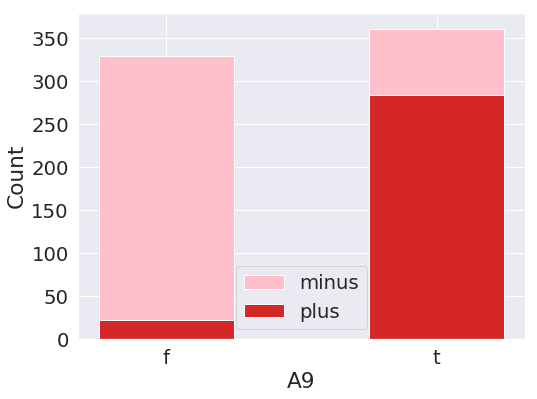

In [0]:
#define categories
A9_categories = ["f","t"]
plus_values = ctable6.iloc[0][0:2]
minus_values = ctable6.iloc[1][0:2]

#Plot the bar chart
fig = plt.figure(figsize=(8, 6))
sns.set(font_scale=1.8)
categories = ["f","t"]
p1 = plt.bar(categories, plus_values, .5, color='#d62728')
p2 = plt.bar(categories, minus_values, 0.5, color = 'pink', bottom=plus_values)
plt.legend((p2[0], p1[0]), ('minus', 'plus'))
plt.xlabel('A9')
plt.ylabel('Count')
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

##For Testing on Continuous Variables
 - The null hypothesis is that the means between the +, - classes are the same
 - The alternative hypothesis is that the means between +, - classes are not the same and there are outside factors affecting them
 
###A14:
 - The t statistic is -2.63 and pvalue=0.008
 - Since p< 0.05 we reject the null hypothesis, but barely
 
 
### A11:
 - The t statistic=11.66, and pvalue=7.95e-29
 - Since p<<< 0.05 we reject the null hypothesis, and this is extremely significant because the p value is so low 
 
 
## For Testing on Categorical Variables
- The null hypothesis is that the variables are independent
- The alternative hypothesis is that the variables are dependent

###A9
-  The chi-squared value is 355.2038 and the p-value is 3e-79
- The p-value <<<< 0.5, and we can reject the null hypothesis
- This tells us that A16 has a very strong dependence on A9


###A13
- The chi-squared value is 9.1916 and the p-value= 0.0101
- The p-value is just barely under 0.05, and we can reject the null hypothesis
- This tells us that A16 has dependence on A13

##Challenges
- plotting the box plots